In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1FS-JXMl-PFGzA2ogy1xdBKVI6VbVDQMF

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1FS-JXMl-PFGzA2ogy1xdBKVI6VbVDQMF
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 65.9MB/s]


In [3]:
df = pd.read_csv('/content/heart_disease_health_indicators.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


In [4]:
df = df.rename(columns={'Income': 'HeartDiseaseorAttack', 'HeartDiseaseorAttack': 'Income'})
df

,Income,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,HeartDiseaseorAttack
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


In [5]:
df['Income'], df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].copy(), df['Income'].copy()
df

,Income,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,HeartDiseaseorAttack
0,3,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,0
1,1,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,0
2,8,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,0
3,6,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,0
4,4,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,8,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,0
253657,3,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,0
253658,5,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,0
253659,1,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,0


In [6]:
# جدا کردن ویژگی‌ها و خروجی
features = df.iloc[:, :-1]  # ستونهای ۲ تا آخر به عنوان ویژگی‌ها
output = df.iloc[:, -1]    # ستون اول به عنوان خروجی

# ایجاد دیتافریم جدید برای هر کلاس
class_0_samples = df[output == 0].head(100)
class_1_samples = df[output == 1].head(100)

# ادغام داده‌های دو کلاس در یک دیتافریم جدید
new_df = pd.concat([class_0_samples, class_1_samples], ignore_index=True)
new_df

,Income,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,HeartDiseaseorAttack
0,3,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,0
1,1,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,0
2,8,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,0
3,6,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,0
4,4,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,1,1,1,25,1,0,2,1,1,...,1,0,2,1,0,0,0,11,6,1
196,6,0,1,1,29,0,0,0,0,1,...,1,0,5,0,30,1,1,13,5,1
197,5,1,0,1,31,0,0,2,0,0,...,1,0,5,0,30,1,1,13,4,1
198,3,1,1,1,30,0,0,0,1,0,...,1,0,5,0,30,1,0,13,3,1


In [7]:
shuffled_data = shuffle(new_df)
shuffled_data.to_csv('created_data.csv', index=False)
print(shuffled_data)

     Income  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  \
34        3       0         0          1   26       1       0         0   
11        7       0         0          1   26       1       0         0   
199       7       1         1          1   32       0       0         2   
149       1       1         1          1   25       0       1         2   
79        7       1         1          1   29       1       0         2   
..      ...     ...       ...        ...  ...     ...     ...       ...   
108       3       1         1          1   23       1       1         2   
9         8       0         0          1   25       1       0         2   
164       8       0         0          1   22       1       0         0   
128       7       1         1          1   26       1       0         2   
144       3       1         1          1   29       1       0         0   

     PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
34              1 

In [8]:
df1 = pd.read_csv('/content/created_data.csv')
df1

,Income,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,HeartDiseaseorAttack
0,3,0,0,1,26,1,0,0,1,1,...,0,0,1,0,1,0,1,4,5,0
1,7,0,0,1,26,1,0,0,0,0,...,1,0,3,0,15,0,0,7,5,0
2,7,1,1,1,32,0,0,2,1,0,...,1,0,5,30,30,0,0,7,5,1
3,1,1,1,1,25,0,1,2,1,1,...,1,1,4,5,15,1,0,11,3,1
4,7,1,1,1,29,1,0,2,1,1,...,1,0,3,0,0,0,1,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,1,1,1,23,1,1,2,0,1,...,1,1,1,2,0,0,0,7,5,1
196,8,0,0,1,25,1,0,2,1,1,...,1,0,3,0,0,0,1,13,6,0
197,8,0,0,1,22,1,0,0,1,1,...,1,0,3,0,0,0,1,7,4,1
198,7,1,1,1,26,1,0,2,0,1,...,1,0,4,0,0,0,0,10,6,1


In [9]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1].values.reshape(-1,1)
X.shape,y.shape

((200, 21), (200, 1))

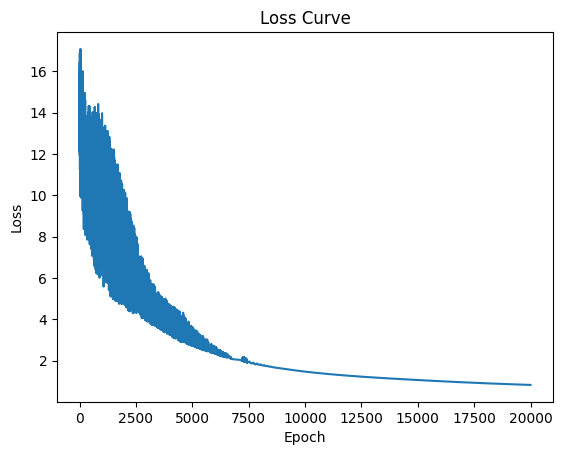

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = SGDClassifier(loss='log_loss',max_iter=20000, random_state=27)
y_train = y_train.ravel()
y_test = y_test.ravel()
# آموزش مدل و دریافت مقدار تابع اتلاف در هر تکرار
loss_history = [];

for epoch in range(20000):
    # آموزش مدل
    model.partial_fit(x_train, y_train, classes=np.unique(y))

    # پیش‌بینی احتمالات
    y_prob = model.predict_proba(x_train);

    # محاسبه تابع اتلاف
    loss = log_loss(y_train, y_prob);

    loss_history.append(loss);


# نمایش نمودار تغییرات تابع اتلاف در هر تکرار
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [14]:
model.score(x_train,y_train)

0.70625

In [15]:
model.score(x_test,y_test)

0.75

In [16]:
y_pred=model.predict(x_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# محاسبه recall برای کلاس 0
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
print(f"Recall for Class 0: {recall_class_0}")

# محاسبه precision برای کلاس 0
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
print(f"Precision for Class 0: {precision_class_0}")

# محاسبه recall برای کلاس 1
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall for Class 1: {recall_class_1}")

# محاسبه precision برای کلاس 1
precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision for Class 1: {precision_class_1}")

Confusion Matrix:
[[18  3]
 [ 7 12]]
Recall for Class 0: 0.8571428571428571
Precision for Class 0: 0.72
Recall for Class 1: 0.631578947368421
Precision for Class 1: 0.8


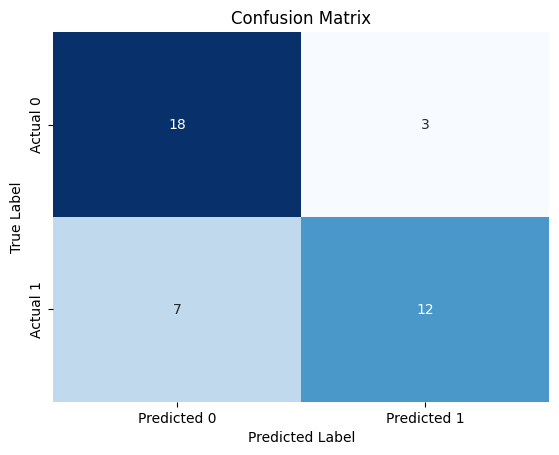

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

# رسم ماتریس درهم‌ریختگی با استفاده از سی‌بورن
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()